In [1]:
import json, numpy as np, os
from quantitative_experiments import generate_experiment, generate_all_sequential, gather_performances, plot_performances
from CIRCE import show_predicate, CIRCE
from simulation import get_dimension_info, transition_multi_house, get_initial_state
from experiments import generate_quantitative_experiment_timesteps, get_expected_pred, evaluate_generated_predicate, generate_observations
from rendering import plot_behavior, plot_single_room

In [2]:
import matplotlib.pyplot as plt

In [3]:
os.chdir("..")

# Qualitative experiments

In [4]:
with open("experiments/hyperparameters.json") as file:
  hp = json.load(file)
dim_labels, discrete_dims = get_dimension_info(hp)
measure_labels = [label for label in dim_labels if "true" not in label]

In [5]:
measures = generate_observations(
    transition_multi_house,
    hp,
    get_dimension_info,
    get_initial_state,
    seed=1,
    verbose=1)
M = np.array(measures)

100%|██████████| 5000/5000 [00:05<00:00, 961.10it/s] 


In [6]:
targets_blanks = {"Q1": ("house_{k}_room_{i}_{j}_heater_state", ">", .5),
           "Q2": ("house_{k}_room_{i}_{j}_measured_inside_T", "<=", 15.),
           "Q3": ("house_{k}_room_{i}_{j}_window_state", "<=", .5),
           "Q4": ("house_{k}_room_{i}_{j}_measured_inside_T", ">", 30)}
timesteps = generate_quantitative_experiment_timesteps(M, measure_labels, dim_labels, targets_blanks, hp, seed=0)
targets = {}
for q, ts in timesteps.items():
  dim, comp, th = targets_blanks[q]
  targets[q] = [(dim.format(k=0,i=ts[0],j=ts[1]),comp,th)]

100%|██████████| 58/58 [00:00<00:00, 133.30it/s]


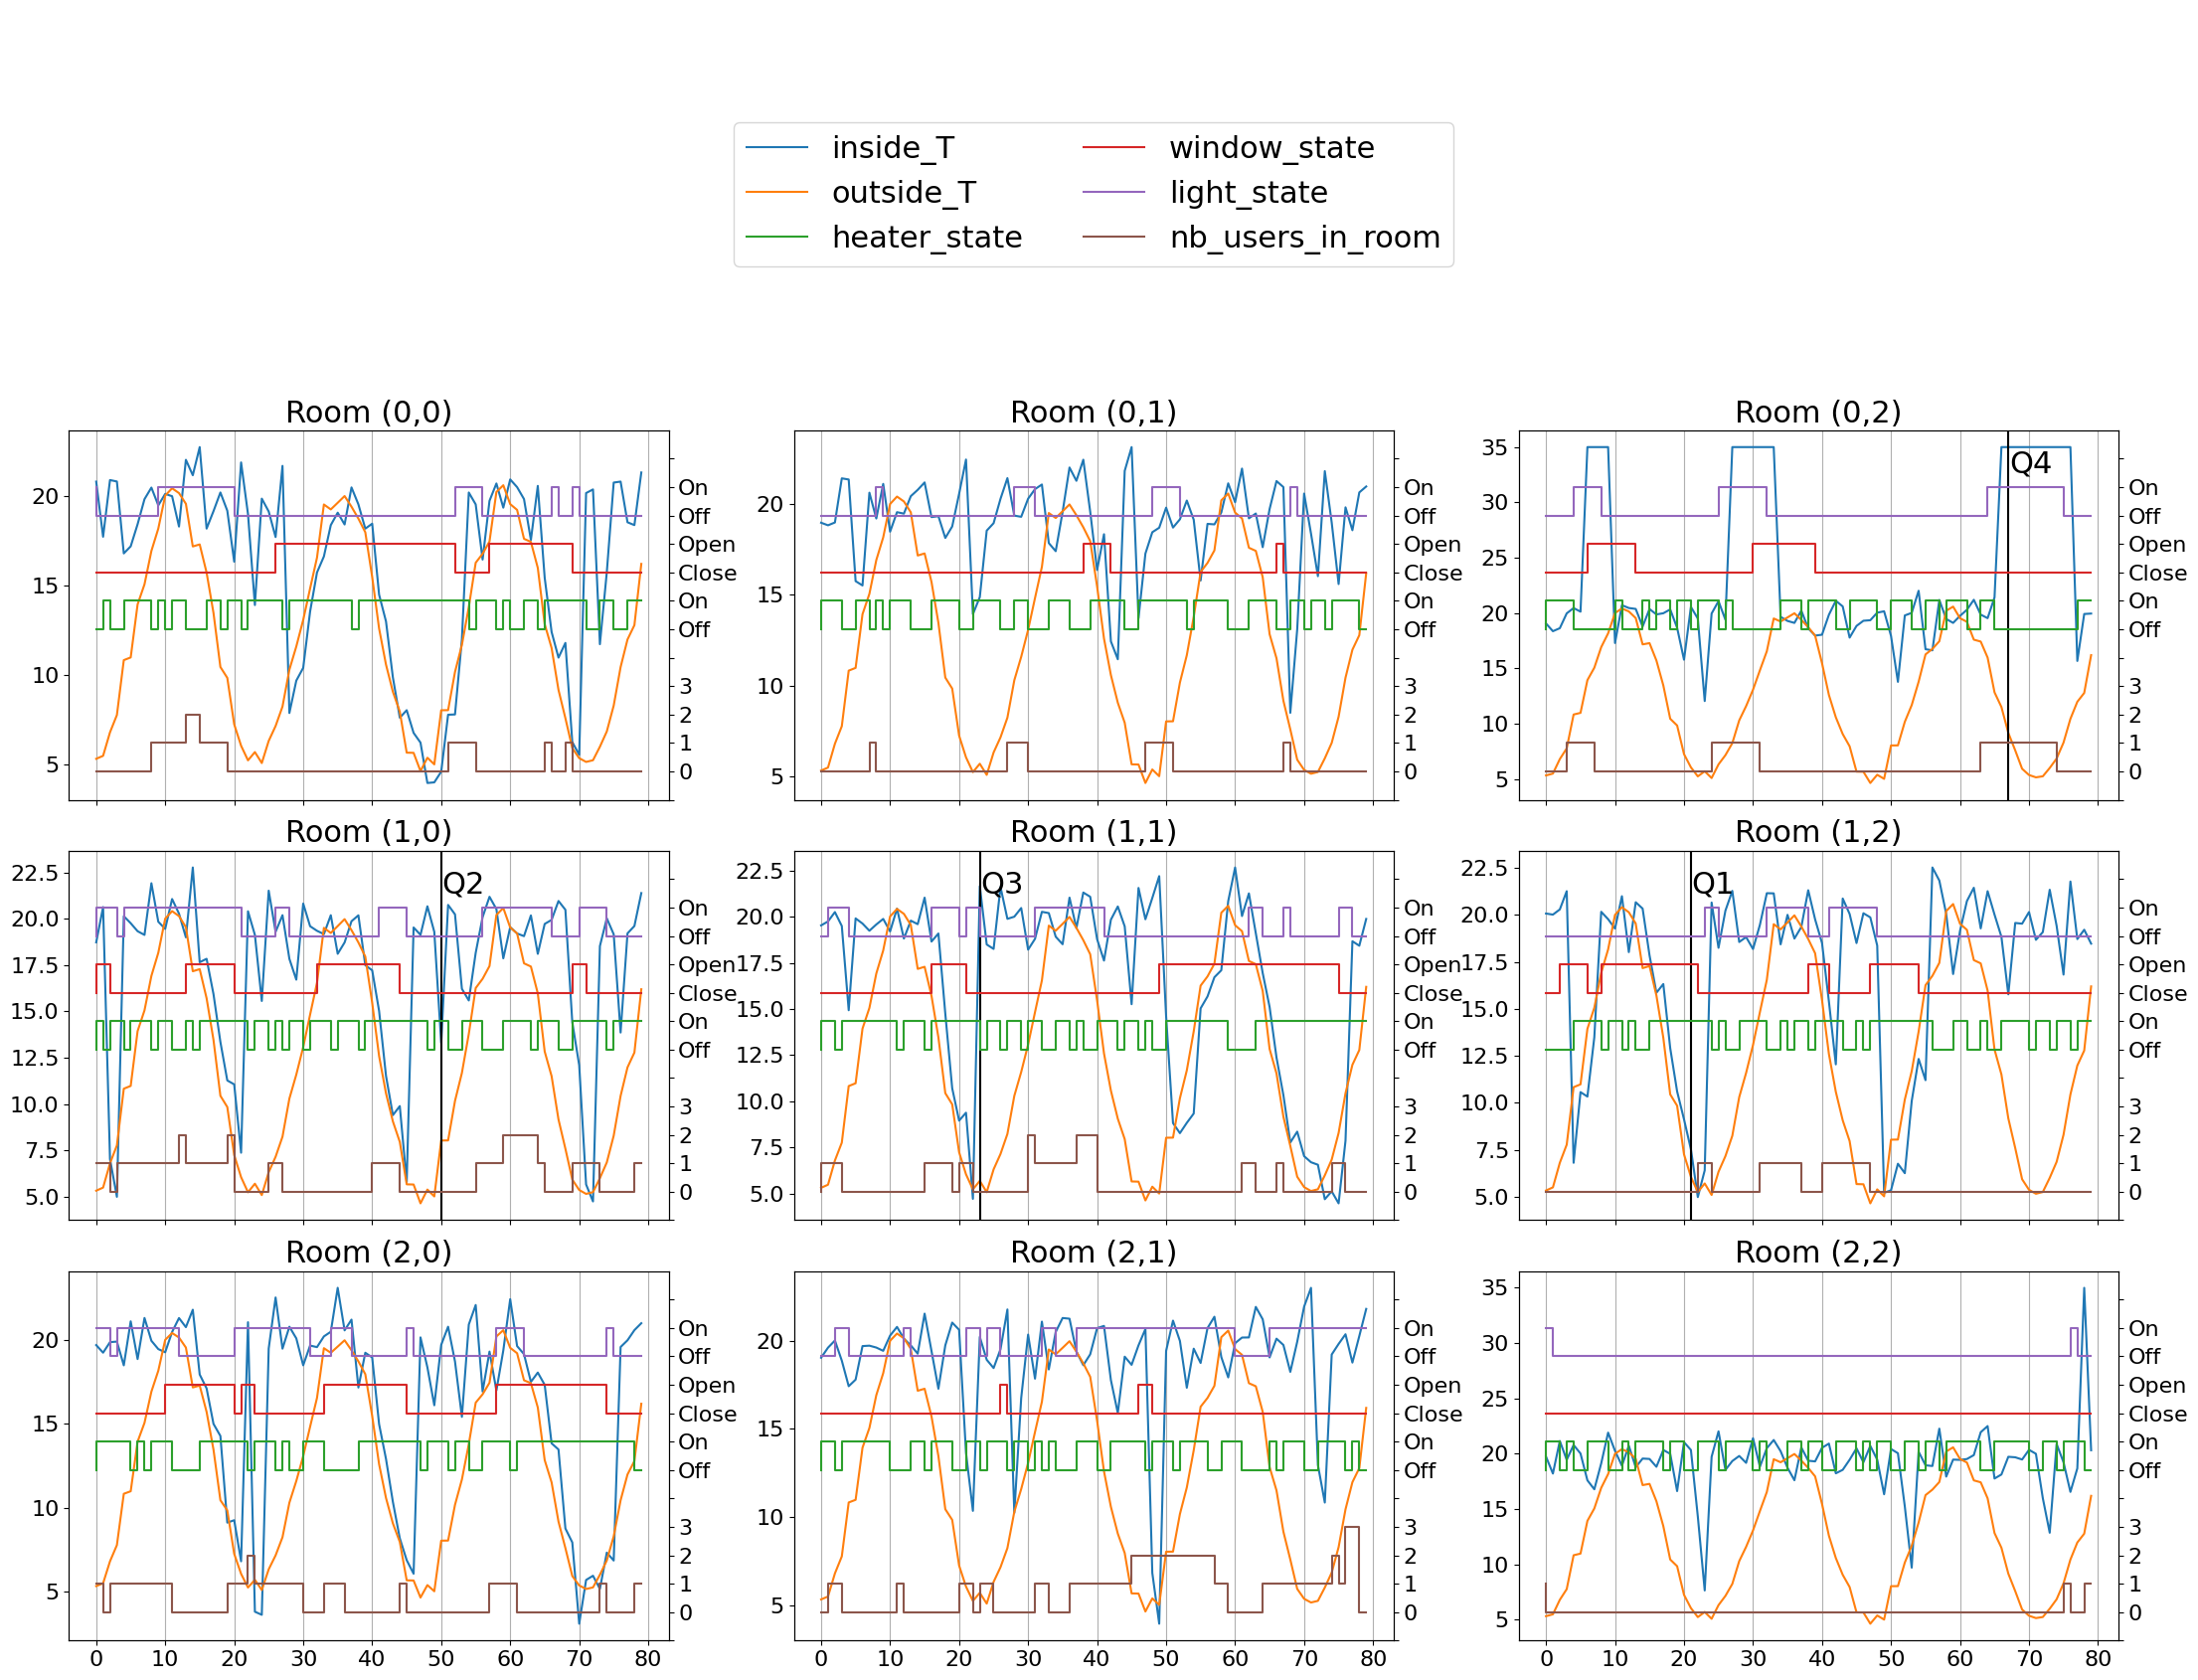

In [8]:
plot_behavior(0, M, measure_labels, np.where(discrete_dims)[0], hp, timesteps=timesteps, save=False)

In [12]:
# Q1
i,j,t0 = timesteps["Q1"]
T = targets['Q1']
print(f"Why {show_predicate(T)}?")
tree, BF, CBF, times = CIRCE(T, t0, M, transition_multi_house, hp, measure_labels, verbose=0, seed=42, save=False)
print(f"  => Minimal cause: {show_predicate(BF)}")
print(f"  => Sufficient cause: {show_predicate(CBF)}")
print(f"    => Expected: {show_predicate(get_expected_pred('Q1', 0, 0,i,j,hp))}")
r,p,f1 = evaluate_generated_predicate(get_expected_pred("Q1", 0, 0,i,j,hp), CBF)
print(f"    => recall={r:.2f}, precision={p:.2f}, f1={f1:.2f}")
print()

T = [(f"house_0_room_{i}_{j}_measured_inside_T", "<=", 19.)]
print(f"Why {show_predicate(T)}?")
tree, BF, CBF, times = CIRCE(T, t0-1, M, transition_multi_house, hp, measure_labels, verbose=0, seed=42, save=False)
print(f"  => Minimal cause: {show_predicate(BF)}")
print(f"  => Sufficient cause: {show_predicate(CBF)}")
print(f"    => Expected: {show_predicate(get_expected_pred('Q1', 1, 0,i,j,hp))}")
r,p,f1 = evaluate_generated_predicate(get_expected_pred("Q1", 1, 0,i,j,hp), CBF)
print(f"    => recall={r:.2f}, precision={p:.2f}, f1={f1:.2f}")

Why house_0_room_1_2_heater_state > 0.50?
  => Minimal cause: house_0_room_1_2_measured_inside_T <= 19.99
  => Sufficient cause: house_0_room_1_2_measured_inside_T <= 19.99
    => Expected: house_0_room_1_2_measured_inside_T <= 20.00
    => recall=1.00, precision=1.00, f1=1.00

Why house_0_room_1_2_measured_inside_T <= 19.00?
  => Minimal cause: house_0_room_1_2_window_state > 0.50
  => Sufficient cause: house_0_room_1_2_window_state > 0.50 and outside_T <= 18.68
    => Expected: house_0_room_1_2_window_state > 0.50 and outside_T <= 19.00
    => recall=1.00, precision=1.00, f1=1.00


In [13]:
# Q2
i,j,t0 = timesteps["Q2"]
T = targets['Q2']

print(f"Why {show_predicate(T)}?")
tree, BF, CBF, times = CIRCE(T, t0, M, transition_multi_house, hp, measure_labels, verbose=0, seed=42, save=False)
print(f"  => Minimal cause: {show_predicate(BF)}")
print(f"  => Sufficient cause: {show_predicate(CBF)}")

Why house_0_room_1_0_measured_inside_T <= 15.00?
  => Minimal cause: house_0_room_1_0_heater_state <= 0.50 and house_0_room_2_1_measured_inside_T <= 14.51 and house_0_room_0_0_measured_inside_T <= 17.07 and house_2_room_2_0_nb_users_in_room > 0.50
  => Sufficient cause: house_0_room_1_0_heater_state <= 0.50 and house_0_room_2_1_measured_inside_T <= 14.51 and house_0_room_0_0_measured_inside_T <= 17.07


In [14]:
# Q3
i,j,t0 = timesteps["Q3"]
T = targets['Q3']

print(f"Why {show_predicate(T)}?")
tree, BF, CBF, times = CIRCE(T, t0, M, transition_multi_house, hp, measure_labels, verbose=0, seed=42, save=False)
print(f"  => Minimal cause: {show_predicate(BF)}")
print(f"  => Sufficient cause: {show_predicate(CBF)}")
print(f"    => Expected: {show_predicate(get_expected_pred('Q3', 0, 0,i,j,hp))}")
r,p,f1 = evaluate_generated_predicate(get_expected_pred("Q3", 0, 0,i,j,hp), CBF)
print(f"    => recall={r:.2f}, precision={p:.2f}, f1={f1:.2f}")
print()

print("\n",times)
print()

print(f"Why {show_predicate(T)}?")
tree, BF, CBF, times = CIRCE(T, t0-1, M, transition_multi_house, hp, measure_labels, verbose=0, seed=42, save=False)
print(f"  => Minimal cause: {show_predicate(BF)}")
print(f"  => Sufficient cause: {show_predicate(CBF)}")
print(f"    => Expected: {show_predicate(get_expected_pred('Q3', 1, 0,i,j,hp))}")
r,p,f1 = evaluate_generated_predicate(get_expected_pred("Q3", 1, 0,i,j,hp), CBF)
print(f"    => recall={r:.2f}, precision={p:.2f}, f1={f1:.2f}")

Why house_0_room_1_1_window_state <= 0.50?
  => Minimal cause: house_0_room_1_1_window_state <= 0.50
  => Sufficient cause: house_0_room_1_1_window_state <= 0.50 and house_0_room_1_1_measured_inside_T <= 21.84
    => Expected: house_0_room_1_1_window_state <= 0.50 and house_0_room_1_1_measured_inside_T <= 25.00
    => recall=1.00, precision=1.00, f1=1.00


 (9.18962004990317, 0.05335010401904583, 0.0002806680276989937, 6691)

Why house_0_room_1_1_window_state <= 0.50?
  => Minimal cause: house_0_room_1_1_measured_inside_T <= 10.33
  => Sufficient cause: house_0_room_1_1_measured_inside_T <= 10.33 and house_0_room_1_1_nb_users_in_room > 0.50
    => Expected: house_0_room_1_1_nb_users_in_room > 0.50 and house_0_room_1_1_measured_inside_T <= 10.00
    => recall=1.00, precision=1.00, f1=1.00


In [15]:
# Q4
i,j,t0 = timesteps["Q4"]
T = targets['Q4']

print(f"Why {show_predicate(T)}?")
tree, BF, CBF, times = CIRCE(T, t0, M, transition_multi_house, hp, measure_labels, verbose=0, seed=42, save=False)
print(f"  => Minimal cause: {show_predicate(BF)}")
print(f"  => Sufficient cause: {show_predicate(CBF)}")

Why house_0_room_0_2_measured_inside_T > 30.00?
  => Minimal cause: house_0_room_0_2_light_state > 0.50
  => Sufficient cause: house_0_room_0_2_light_state > 0.50 and house_0_room_0_2_th_y <= 2.76 and house_0_room_0_2_light_y <= 4.16


# Quantitative experiments

In [16]:
# generate_experiment(None, None, None, sequential=True, verbose=1)
# generate_all_sequential(small=True, full_sequential=True)
# all_performances = gather_performances()

In [19]:
with open("results/all_performances.json") as file:
  all_performances = json.load(file)

In [21]:
# print(json.dumps(all_performances, indent=2))

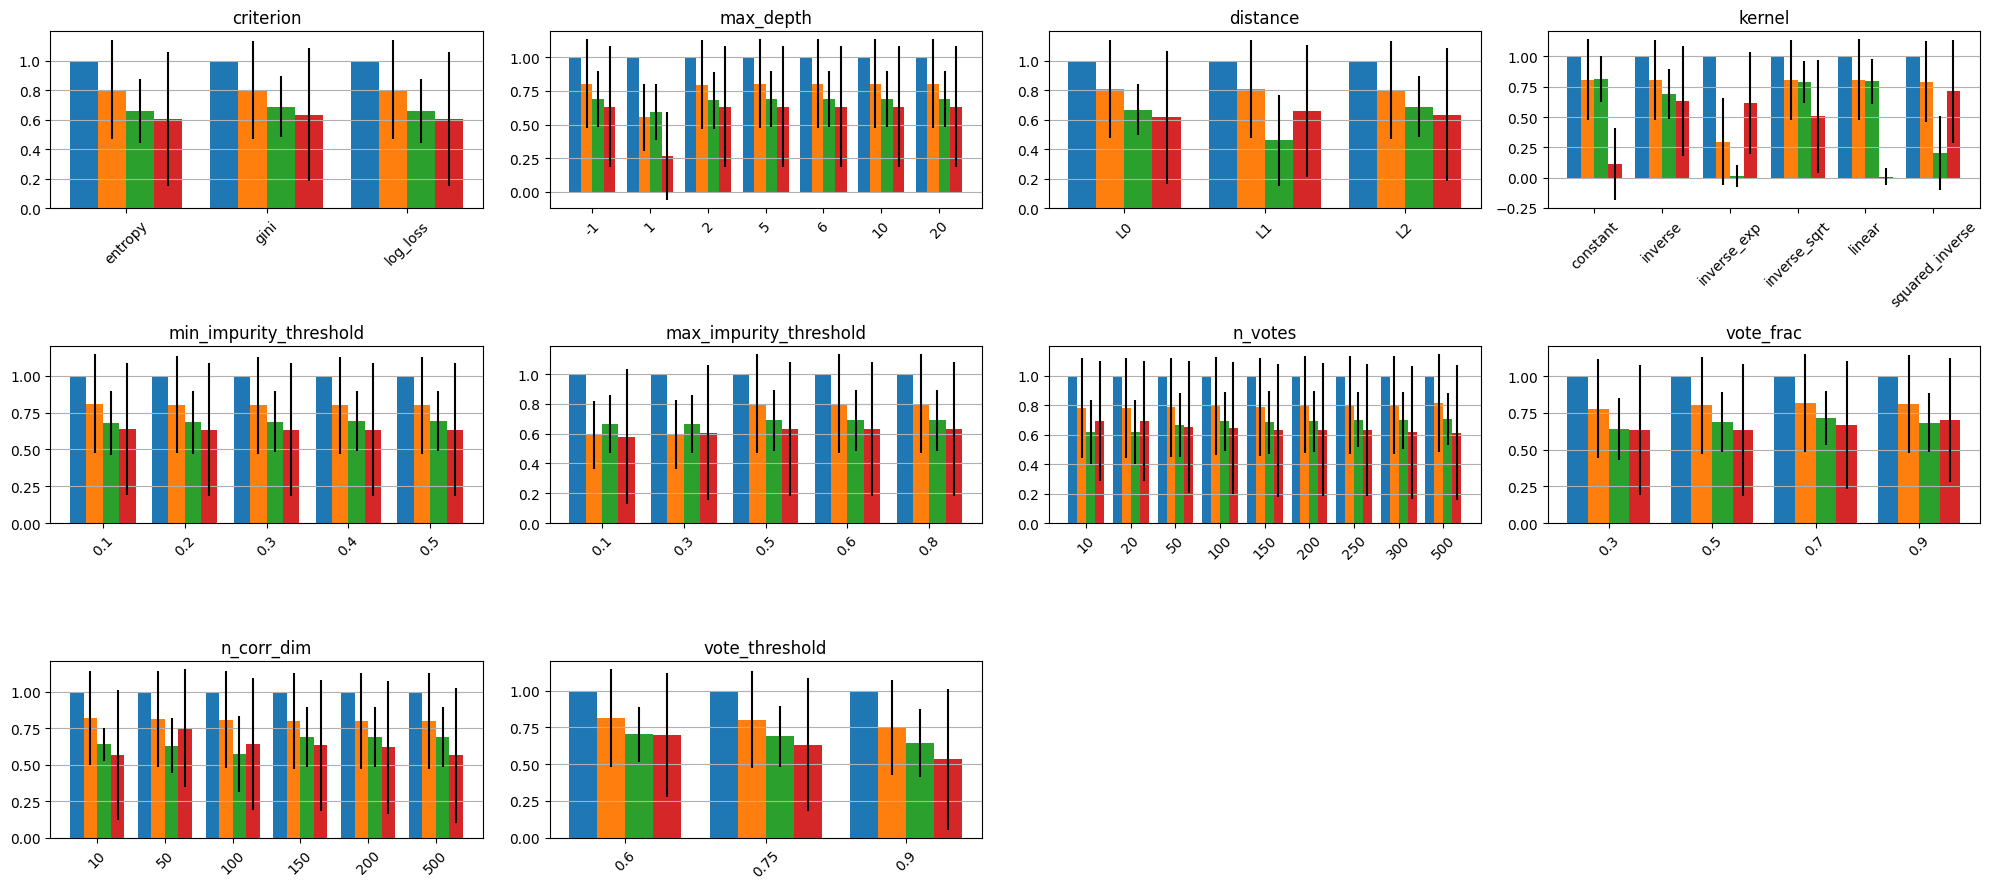

In [22]:
plot_performances(all_performances, save=False)